In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as pgo
import warnings
warnings.filterwarnings('ignore')
from prophet import Prophet
from prophet.plot import plot_plotly

In [2]:
df = pd.read_csv('covid_19_clean_complete.csv')
df.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [3]:
df.drop(columns=['Province/State','Lat','Long','WHO Region'],inplace=True)
df.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,2020-01-22,0,0,0,0
1,Albania,2020-01-22,0,0,0,0
2,Algeria,2020-01-22,0,0,0,0
3,Andorra,2020-01-22,0,0,0,0
4,Angola,2020-01-22,0,0,0,0


In [7]:
df.rename(columns={'Country/Region':'Country'},inplace=True)
df.head()

,Country,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,2020-01-22,0,0,0,0
1,Albania,2020-01-22,0,0,0,0
2,Algeria,2020-01-22,0,0,0,0
3,Andorra,2020-01-22,0,0,0,0
4,Angola,2020-01-22,0,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    49068 non-null  object
 1   Date       49068 non-null  object
 2   Confirmed  49068 non-null  int64 
 3   Deaths     49068 non-null  int64 
 4   Recovered  49068 non-null  int64 
 5   Active     49068 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.2+ MB


In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Country    49068 non-null  object        
 1   Date       49068 non-null  datetime64[ns]
 2   Confirmed  49068 non-null  int64         
 3   Deaths     49068 non-null  int64         
 4   Recovered  49068 non-null  int64         
 5   Active     49068 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 2.2+ MB


In [10]:
print(f"Total number of rows present inside the dataset : {df.shape[0]}")
print(f"Total number of columns present inside the dataset : {df.shape[1]}")

Total number of rows present inside the dataset : 49068
Total number of columns present inside the dataset : 6


In [11]:
df.describe(include='all')

,Country,Date,Confirmed,Deaths,Recovered,Active
count,49068,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
unique,187,NaN,NaN,NaN,NaN,NaN
top,China,NaN,NaN,NaN,NaN,NaN
freq,6204,NaN,NaN,NaN,NaN,NaN
mean,NaN,2020-04-24 12:00:00,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
min,NaN,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,NaN,2020-03-08 18:00:00,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,NaN,2020-04-24 12:00:00,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,NaN,2020-06-10 06:00:00,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,NaN,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [12]:
df.duplicated().sum()

1896

In [13]:
# remove duplicates
df.drop_duplicates(inplace=True)        

In [14]:
df.duplicated().sum()

0

In [28]:
india_data = df[df['Country']=='India'][['Date','Confirmed']]
india_data

,Date,Confirmed
129,2020-01-22,0
390,2020-01-23,0
651,2020-01-24,0
912,2020-01-25,0
1173,2020-01-26,0
...,...,...
47892,2020-07-23,1288108
48153,2020-07-24,1337024
48414,2020-07-25,1385635
48675,2020-07-26,1435616


In [29]:
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 129 to 48936
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       188 non-null    datetime64[ns]
 1   Confirmed  188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.4 KB


In [30]:
fig = px.line(india_data,x='Date',y='Confirmed',title="Time Series Graph for Confirmed Cases")
fig.show()

In [32]:
india_data['Date'] = pd.to_datetime(india_data['Date'])
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 129 to 48936
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       188 non-null    datetime64[ns]
 1   Confirmed  188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.4 KB


In [33]:
india_data.rename(columns={'Date':'ds','Confirmed':'y'},inplace=True)
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 129 to 48936
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.4 KB


In [34]:
model = Prophet()
model.fit(india_data)

13:20:20 - cmdstanpy - INFO - Chain [1] start processing
13:20:20 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
future_pred = model.make_future_dataframe(periods=365)
future_pred

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
548,2021-07-23
549,2021-07-24
550,2021-07-25
551,2021-07-26


In [36]:
print(f"Original Dataset number of rows : {india_data.shape[0]}")
print(f"Generated Future Dataset number of rows : {future_pred.shape[0]}")

Original Dataset number of rows : 188
Generated Future Dataset number of rows : 553


In [37]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [38]:
prediction = model.predict(future_pred)
prediction.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-2012.366454,-39833.309341,28869.917011,-2012.366454,-2012.366454,-2135.119361,-2135.119361,-2135.119361,-2135.119361,-2135.119361,-2135.119361,0.0,0.0,0.0,-4147.485815
1,2020-01-23,-1952.473281,-39625.225803,30732.052564,-1952.473281,-1952.473281,-1041.798223,-1041.798223,-1041.798223,-1041.798223,-1041.798223,-1041.798223,0.0,0.0,0.0,-2994.271505
2,2020-01-24,-1892.580109,-37880.430261,36373.181726,-1892.580109,-1892.580109,180.279437,180.279437,180.279437,180.279437,180.279437,180.279437,0.0,0.0,0.0,-1712.300673
3,2020-01-25,-1832.686937,-34408.314062,33497.411002,-1832.686937,-1832.686937,1126.790820,1126.790820,1126.790820,1126.790820,1126.790820,1126.790820,0.0,0.0,0.0,-705.896117
4,2020-01-26,-1772.793765,-32417.431812,33962.466328,-1772.793765,-1772.793765,2216.582448,2216.582448,2216.582448,2216.582448,2216.582448,2216.582448,0.0,0.0,0.0,443.788683
5,2020-01-27,-1712.900593,-37051.764448,34378.259068,-1712.900593,-1712.900593,2680.916390,2680.916390,2680.916390,2680.916390,2680.916390,2680.916390,0.0,0.0,0.0,968.015798
6,2020-01-28,-1653.007420,-41070.388216,30227.625440,-1653.007420,-1653.007420,-3027.651511,-3027.651511,-3027.651511,-3027.651511,-3027.651511,-3027.651511,0.0,0.0,0.0,-4680.658931
7,2020-01-29,-1593.114313,-39318.158005,31322.379505,-1593.114313,-1593.114313,-2135.119361,-2135.119361,-2135.119361,-2135.119361,-2135.119361,-2135.119361,0.0,0.0,0.0,-3728.233674
8,2020-01-30,-1533.221205,-36713.032226,33692.260094,-1533.221205,-1533.221205,-1041.798223,-1041.798223,-1041.798223,-1041.798223,-1041.798223,-1041.798223,0.0,0.0,0.0,-2575.019428
9,2020-01-31,-1473.328097,-37256.729328,33440.315919,-1473.328097,-1473.328097,180.279437,180.279437,180.279437,180.279437,180.279437,180.279437,0.0,0.0,0.0,-1293.048661


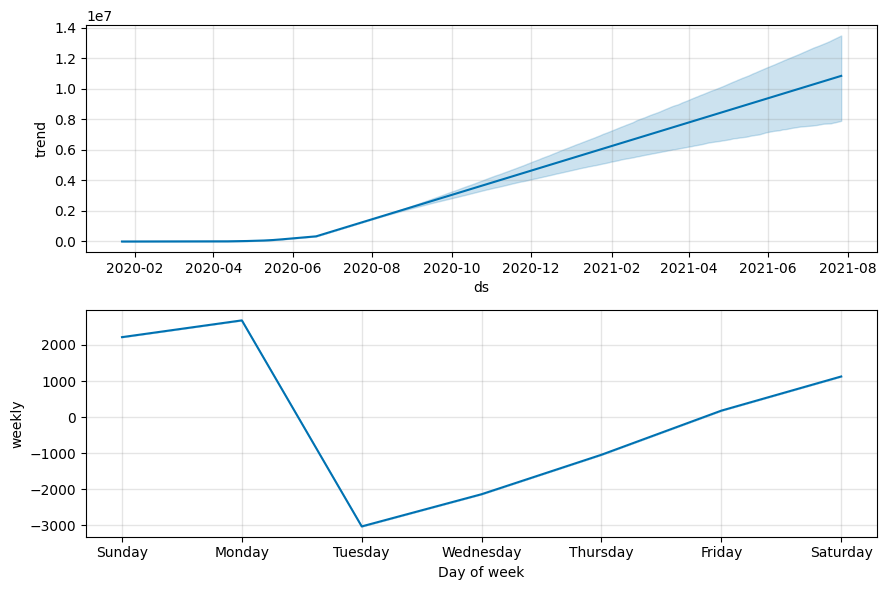

In [39]:
fig = model.plot_components(prediction)
plt.show()

In [40]:

fig = plot_plotly(model,prediction,xlabel='Time',ylabel='Confirmed cases')
fig.update_layout(title='Forecast graph of Time Series model')
fig.show()

In [41]:
india_data = df[df['Country']=='India'][['Date','Recovered']]
india_data

,Date,Recovered
129,2020-01-22,0
390,2020-01-23,0
651,2020-01-24,0
912,2020-01-25,0
1173,2020-01-26,0
...,...,...
47892,2020-07-23,817209
48153,2020-07-24,849432
48414,2020-07-25,885573
48675,2020-07-26,917568


In [42]:
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 129 to 48936
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       188 non-null    datetime64[ns]
 1   Recovered  188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.4 KB


In [43]:
fig = px.line(india_data,x='Date',y='Recovered',title="Time Series Graph for Recovered Cases")
fig.show()

In [44]:
india_data['Date'] = pd.to_datetime(india_data['Date'])
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 129 to 48936
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       188 non-null    datetime64[ns]
 1   Recovered  188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.4 KB


In [45]:
india_data.rename(columns={'Date' : 'ds','Recovered' : 'y'},inplace=True)
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 129 to 48936
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.4 KB


In [46]:
model = Prophet()
model.fit(india_data)

13:23:51 - cmdstanpy - INFO - Chain [1] start processing
13:23:51 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
future = model.make_future_dataframe(periods=365)
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
548,2021-07-23
549,2021-07-24
550,2021-07-25
551,2021-07-26


In [48]:
print(f"Original Dataset number of rows : {india_data.shape[0]}")
print(f"Generated Future Dataset number of rows : {future.shape[0]}")


Original Dataset number of rows : 188
Generated Future Dataset number of rows : 553


In [49]:

model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [50]:
prediction = model.predict(future)
prediction.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-544.477856,-23889.351365,18626.705898,-544.477856,-544.477856,-1679.948862,-1679.948862,-1679.948862,-1679.948862,-1679.948862,-1679.948862,0.0,0.0,0.0,-2224.426718
1,2020-01-23,-535.392135,-22969.051999,18734.048061,-535.392135,-535.392135,-447.897411,-447.897411,-447.897411,-447.897411,-447.897411,-447.897411,0.0,0.0,0.0,-983.289546
2,2020-01-24,-526.306414,-20430.116145,22497.669174,-526.306414,-526.306414,257.082771,257.082771,257.082771,257.082771,257.082771,257.082771,0.0,0.0,0.0,-269.223643
3,2020-01-25,-517.220693,-20704.634645,21088.930706,-517.220693,-517.220693,936.976563,936.976563,936.976563,936.976563,936.976563,936.976563,0.0,0.0,0.0,419.755869
4,2020-01-26,-508.134973,-19916.628036,21457.199306,-508.134973,-508.134973,1169.744005,1169.744005,1169.744005,1169.744005,1169.744005,1169.744005,0.0,0.0,0.0,661.609032
5,2020-01-27,-499.049252,-19483.471448,22678.722152,-499.049252,-499.049252,1658.311236,1658.311236,1658.311236,1658.311236,1658.311236,1658.311236,0.0,0.0,0.0,1159.261984
6,2020-01-28,-489.963531,-24309.057579,17969.116268,-489.963531,-489.963531,-1894.268301,-1894.268301,-1894.268301,-1894.268301,-1894.268301,-1894.268301,0.0,0.0,0.0,-2384.231832
7,2020-01-29,-480.877737,-23077.668990,18776.000819,-480.877737,-480.877737,-1679.948862,-1679.948862,-1679.948862,-1679.948862,-1679.948862,-1679.948862,0.0,0.0,0.0,-2160.826599
8,2020-01-30,-471.791943,-23209.513488,18245.558865,-471.791943,-471.791943,-447.897411,-447.897411,-447.897411,-447.897411,-447.897411,-447.897411,0.0,0.0,0.0,-919.689354
9,2020-01-31,-462.706148,-20703.187570,21913.921688,-462.706148,-462.706148,257.082771,257.082771,257.082771,257.082771,257.082771,257.082771,0.0,0.0,0.0,-205.623378


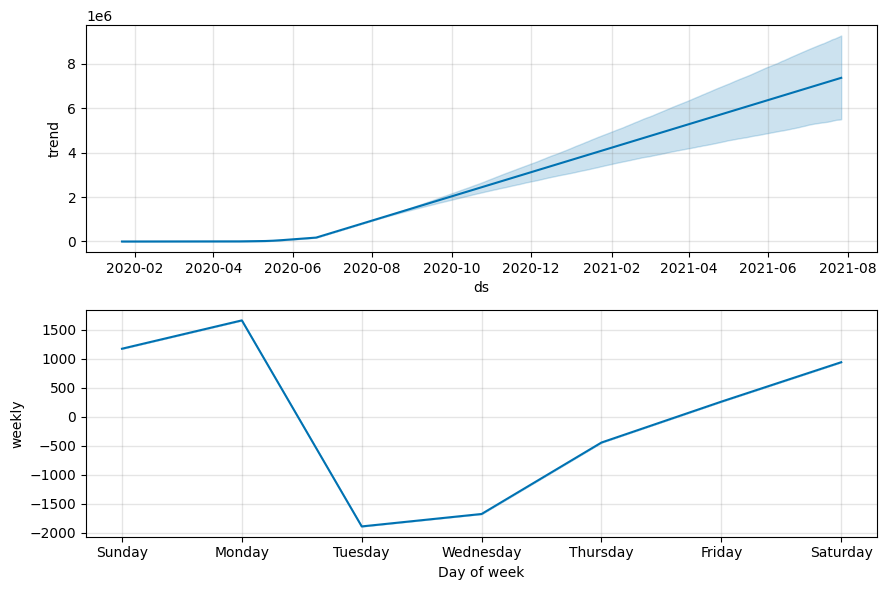

In [51]:

fig = model.plot_components(prediction)
fig.show()

In [52]:
fig = plot_plotly(model,prediction,xlabel='Time',ylabel='Recovered Cases')
fig.update_layout(title='Forecast graph of Time Series Model')
fig.show()

In [53]:
india_data = df[df['Country']=='India'][['Date','Deaths']]
india_data

,Date,Deaths
129,2020-01-22,0
390,2020-01-23,0
651,2020-01-24,0
912,2020-01-25,0
1173,2020-01-26,0
...,...,...
47892,2020-07-23,30601
48153,2020-07-24,31358
48414,2020-07-25,32060
48675,2020-07-26,32771


In [54]:
fig = px.line(india_data,x='Date',y='Deaths',title="Time Series Graph for Death Cases")
fig.show()

In [55]:
india_data['Date'] = pd.to_datetime(india_data['Date'])
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 129 to 48936
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    188 non-null    datetime64[ns]
 1   Deaths  188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.4 KB


In [56]:
india_data.rename(columns={'Date' : 'ds','Deaths' : 'y'},inplace=True)
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 129 to 48936
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.4 KB


In [57]:
model = Prophet()
model.fit(india_data)

13:26:34 - cmdstanpy - INFO - Chain [1] start processing
13:26:34 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
future = model.make_future_dataframe(periods=365)
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
548,2021-07-23
549,2021-07-24
550,2021-07-25
551,2021-07-26


In [59]:
print(f"Original Dataset number of rows : {india_data.shape[0]}")
print(f"Generated Future Dataset number of rows : {future.shape[0]}")

Original Dataset number of rows : 188
Generated Future Dataset number of rows : 553


In [60]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [61]:

prediction = model.predict(future)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-21.527948,-463.857198,427.378426,-21.527948,-21.527948,2.140998,2.140998,2.140998,2.140998,2.140998,2.140998,0.0,0.0,0.0,-19.386950
1,2020-01-23,-20.836435,-474.915026,428.965096,-20.836435,-20.836435,1.664607,1.664607,1.664607,1.664607,1.664607,1.664607,0.0,0.0,0.0,-19.171828
2,2020-01-24,-20.144921,-457.200664,441.334056,-20.144921,-20.144921,6.902727,6.902727,6.902727,6.902727,6.902727,6.902727,0.0,0.0,0.0,-13.242195
3,2020-01-25,-19.453408,-484.046984,429.886636,-19.453408,-19.453408,6.224727,6.224727,6.224727,6.224727,6.224727,6.224727,0.0,0.0,0.0,-13.228681
4,2020-01-26,-18.761894,-470.288119,439.407365,-18.761894,-18.761894,2.316290,2.316290,2.316290,2.316290,2.316290,2.316290,0.0,0.0,0.0,-16.445604


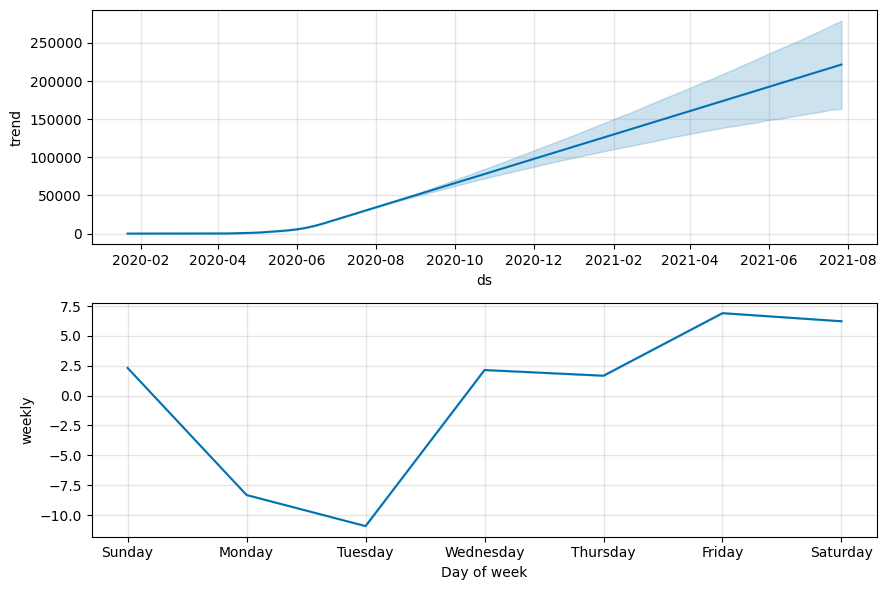

In [62]:

fig = model.plot_components(prediction)
fig.show()

In [63]:
fig = plot_plotly(model,prediction,xlabel='Time',ylabel='Death Cases')
fig.update_layout(title='Forecast graph of Time Series Model')
fig.show()